In [2]:
#imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [3]:
#load data

df = pd.read_csv("./data/Iris.csv",index_col=0)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df = df.reset_index(drop=True,)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


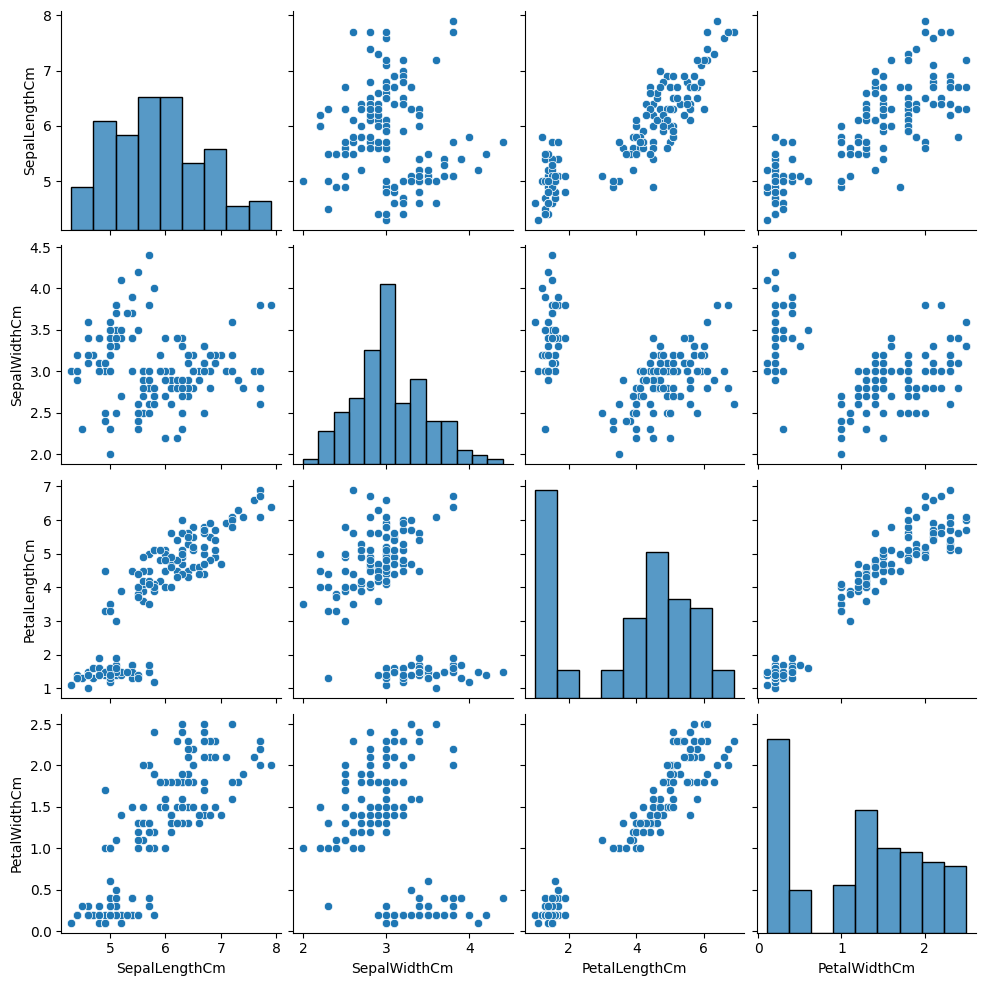

In [5]:
sns.pairplot(data=df)

From the pair plot its visible the petal lenght and petal width have a linear relationship

/home/sam/anaconda3/envs/test/lib/python3.10/site-packages/seaborn/distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/home/sam/anaconda3/envs/test/lib/python3.10/site-packages/seaborn/distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


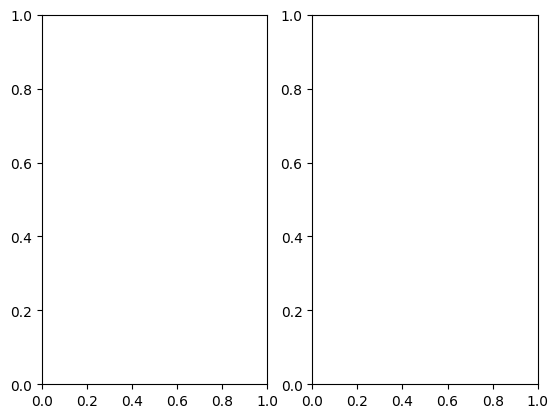

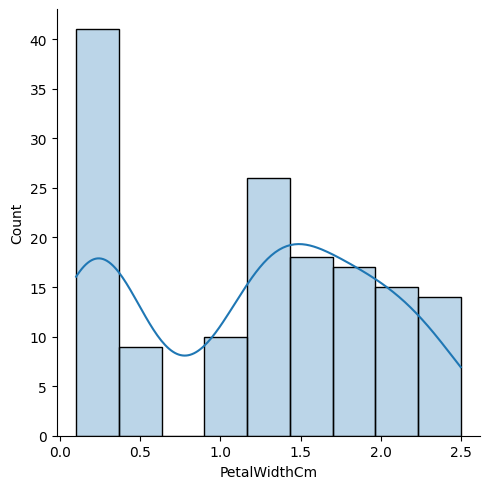

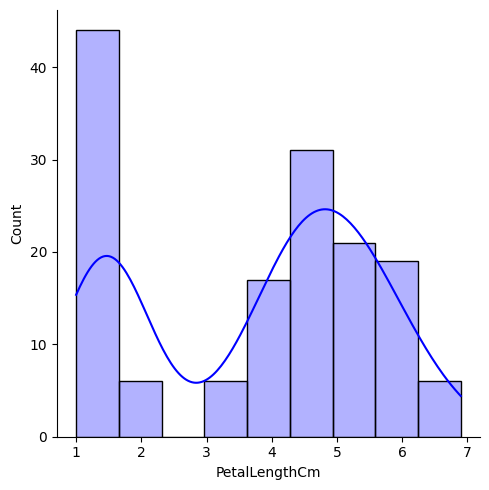

In [6]:
fig,ax = plt.subplots(1,2)
sns.displot(data=df,x="PetalWidthCm",kde=True,alpha=0.3,ax=ax[0] ,)
sns.displot(data=df,x="PetalLengthCm",kde=True,alpha=0.3,color='blue',ax=ax[1]) 
plt.show()

<Axes: xlabel='PetalWidthCm', ylabel='PetalLengthCm'>

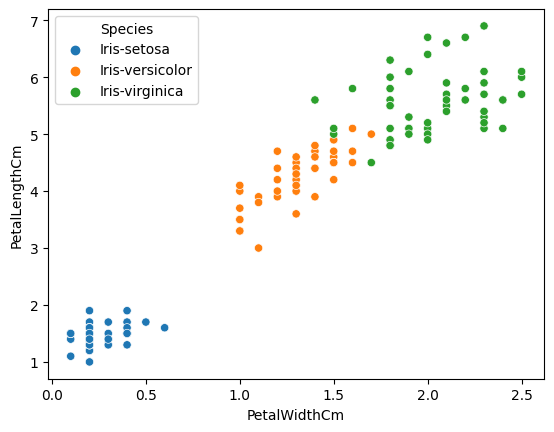

In [7]:
sns.scatterplot(data=df,x="PetalWidthCm",y="PetalLengthCm",hue="Species")

<Axes: xlabel='PetalWidthCm', ylabel='PetalLengthCm'>

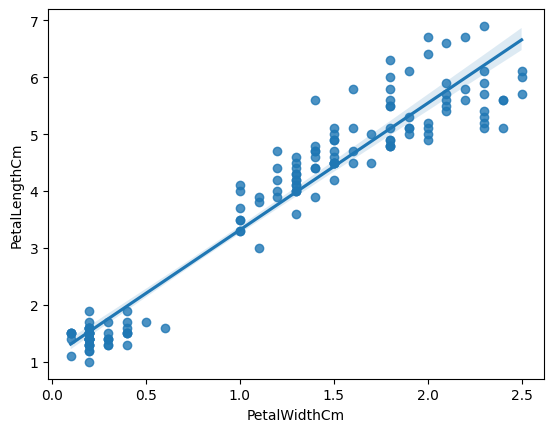

In [8]:
sns.regplot(data=df,x="PetalWidthCm",y="PetalLengthCm")

In [9]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
x= pd.DataFrame(df["PetalLengthCm"])
x.head()

,PetalLengthCm
0,1.4
1,1.4
2,1.3
3,1.5
4,1.4


In [11]:
y = pd.DataFrame(df["PetalWidthCm"])
y.head()

,PetalWidthCm
0,0.2
1,0.2
2,0.2
3,0.2
4,0.2


In [33]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=4)
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE: 0.1750579988259056


In [18]:
df["PredictedWidth"] = model.predict(pd.DataFrame(df["PetalLengthCm"]))

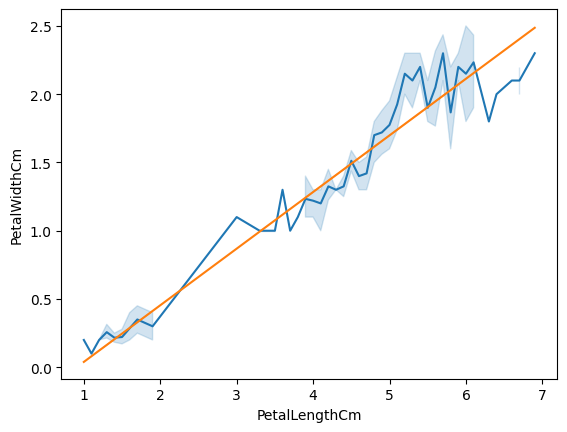

In [19]:
sns.lineplot(data=df,x="PetalLengthCm",y="PetalWidthCm")
sns.lineplot(data=df,x="PetalLengthCm",y="PredictedWidth")
plt.show()

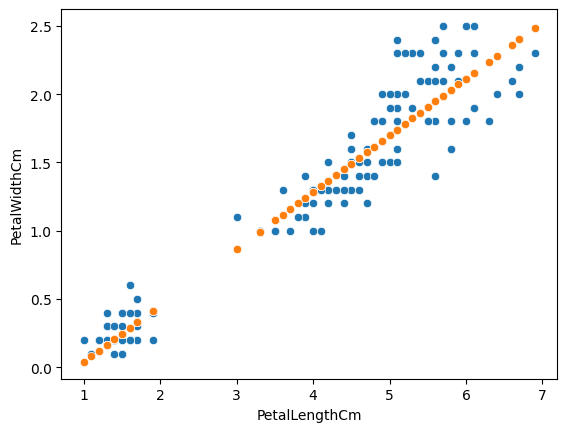

In [20]:
sns.scatterplot(data=df,x="PetalLengthCm",y="PetalWidthCm")
sns.scatterplot(data=df,x="PetalLengthCm",y="PredictedWidth")
plt.show()

In [21]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test,y_pred)

0.18792137837133516